In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/creditdata.csv')

# Display the first few rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
import matplotlib.pyplot as plt

# Correct label definition
labels = ['Normal', 'Fraud']

# Correct value count
fraud_check = df['Class'].value_counts(sort=True)

# Plotting
plt.bar(fraud_check.index, fraud_check.values)
plt.xticks(range(2), labels)
plt.title("Normal and Fraud Distribution")
plt.xlabel("Class")
plt.ylabel("count")
plt.show()


NameError: name 'df' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Proper way to count class distribution
fraud_check = df['Class'].value_counts()

# Display the count
print(fraud_check)

# Plotting the distribution
labels = ['Normal', 'Fraud']  # Now it's defined!
plt.figure(figsize=(6,4))
plt.bar(range(2), fraud_check, color=['green', 'red'])
plt.xticks(range(2), labels)
plt.title('Distribution of Normal vs Fraudulent Transactions')
plt.ylabel('Count')
plt.show()


NameError: name 'df' is not defined

In [ ]:
fraud_people = df[df['Class']==1]
normal_people = df[df['Class']==0]

In [ ]:
fraud_people.shape

(492, 31)

In [ ]:
normal_people.shape

(284315, 31)

In [ ]:
fraud_people['Amount'].describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
normal_people['Amount'].describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


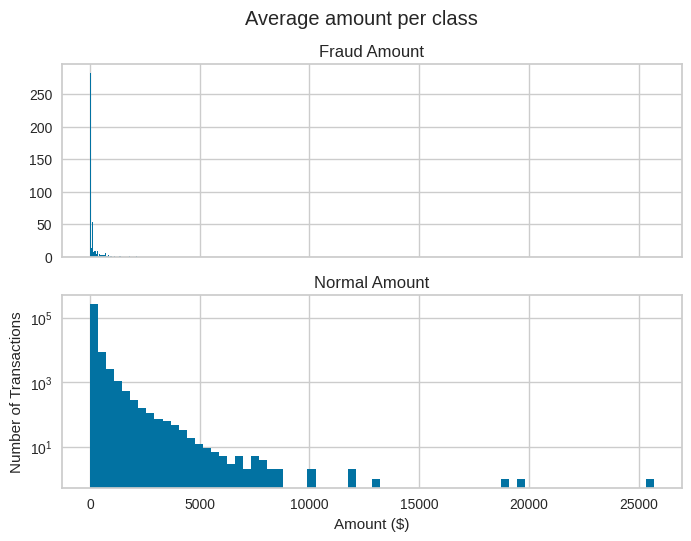

In [ ]:
graph, (plot1, plot2) = plt.subplots(2,1,sharex= True)
graph.suptitle('Average amount per class')
bins = 70

plot1.hist(fraud_people['Amount'] , bins = bins)
plot1.set_title('Fraud Amount')

plot2.hist(normal_people['Amount'] , bins = bins)
plot2.set_title('Normal Amount')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

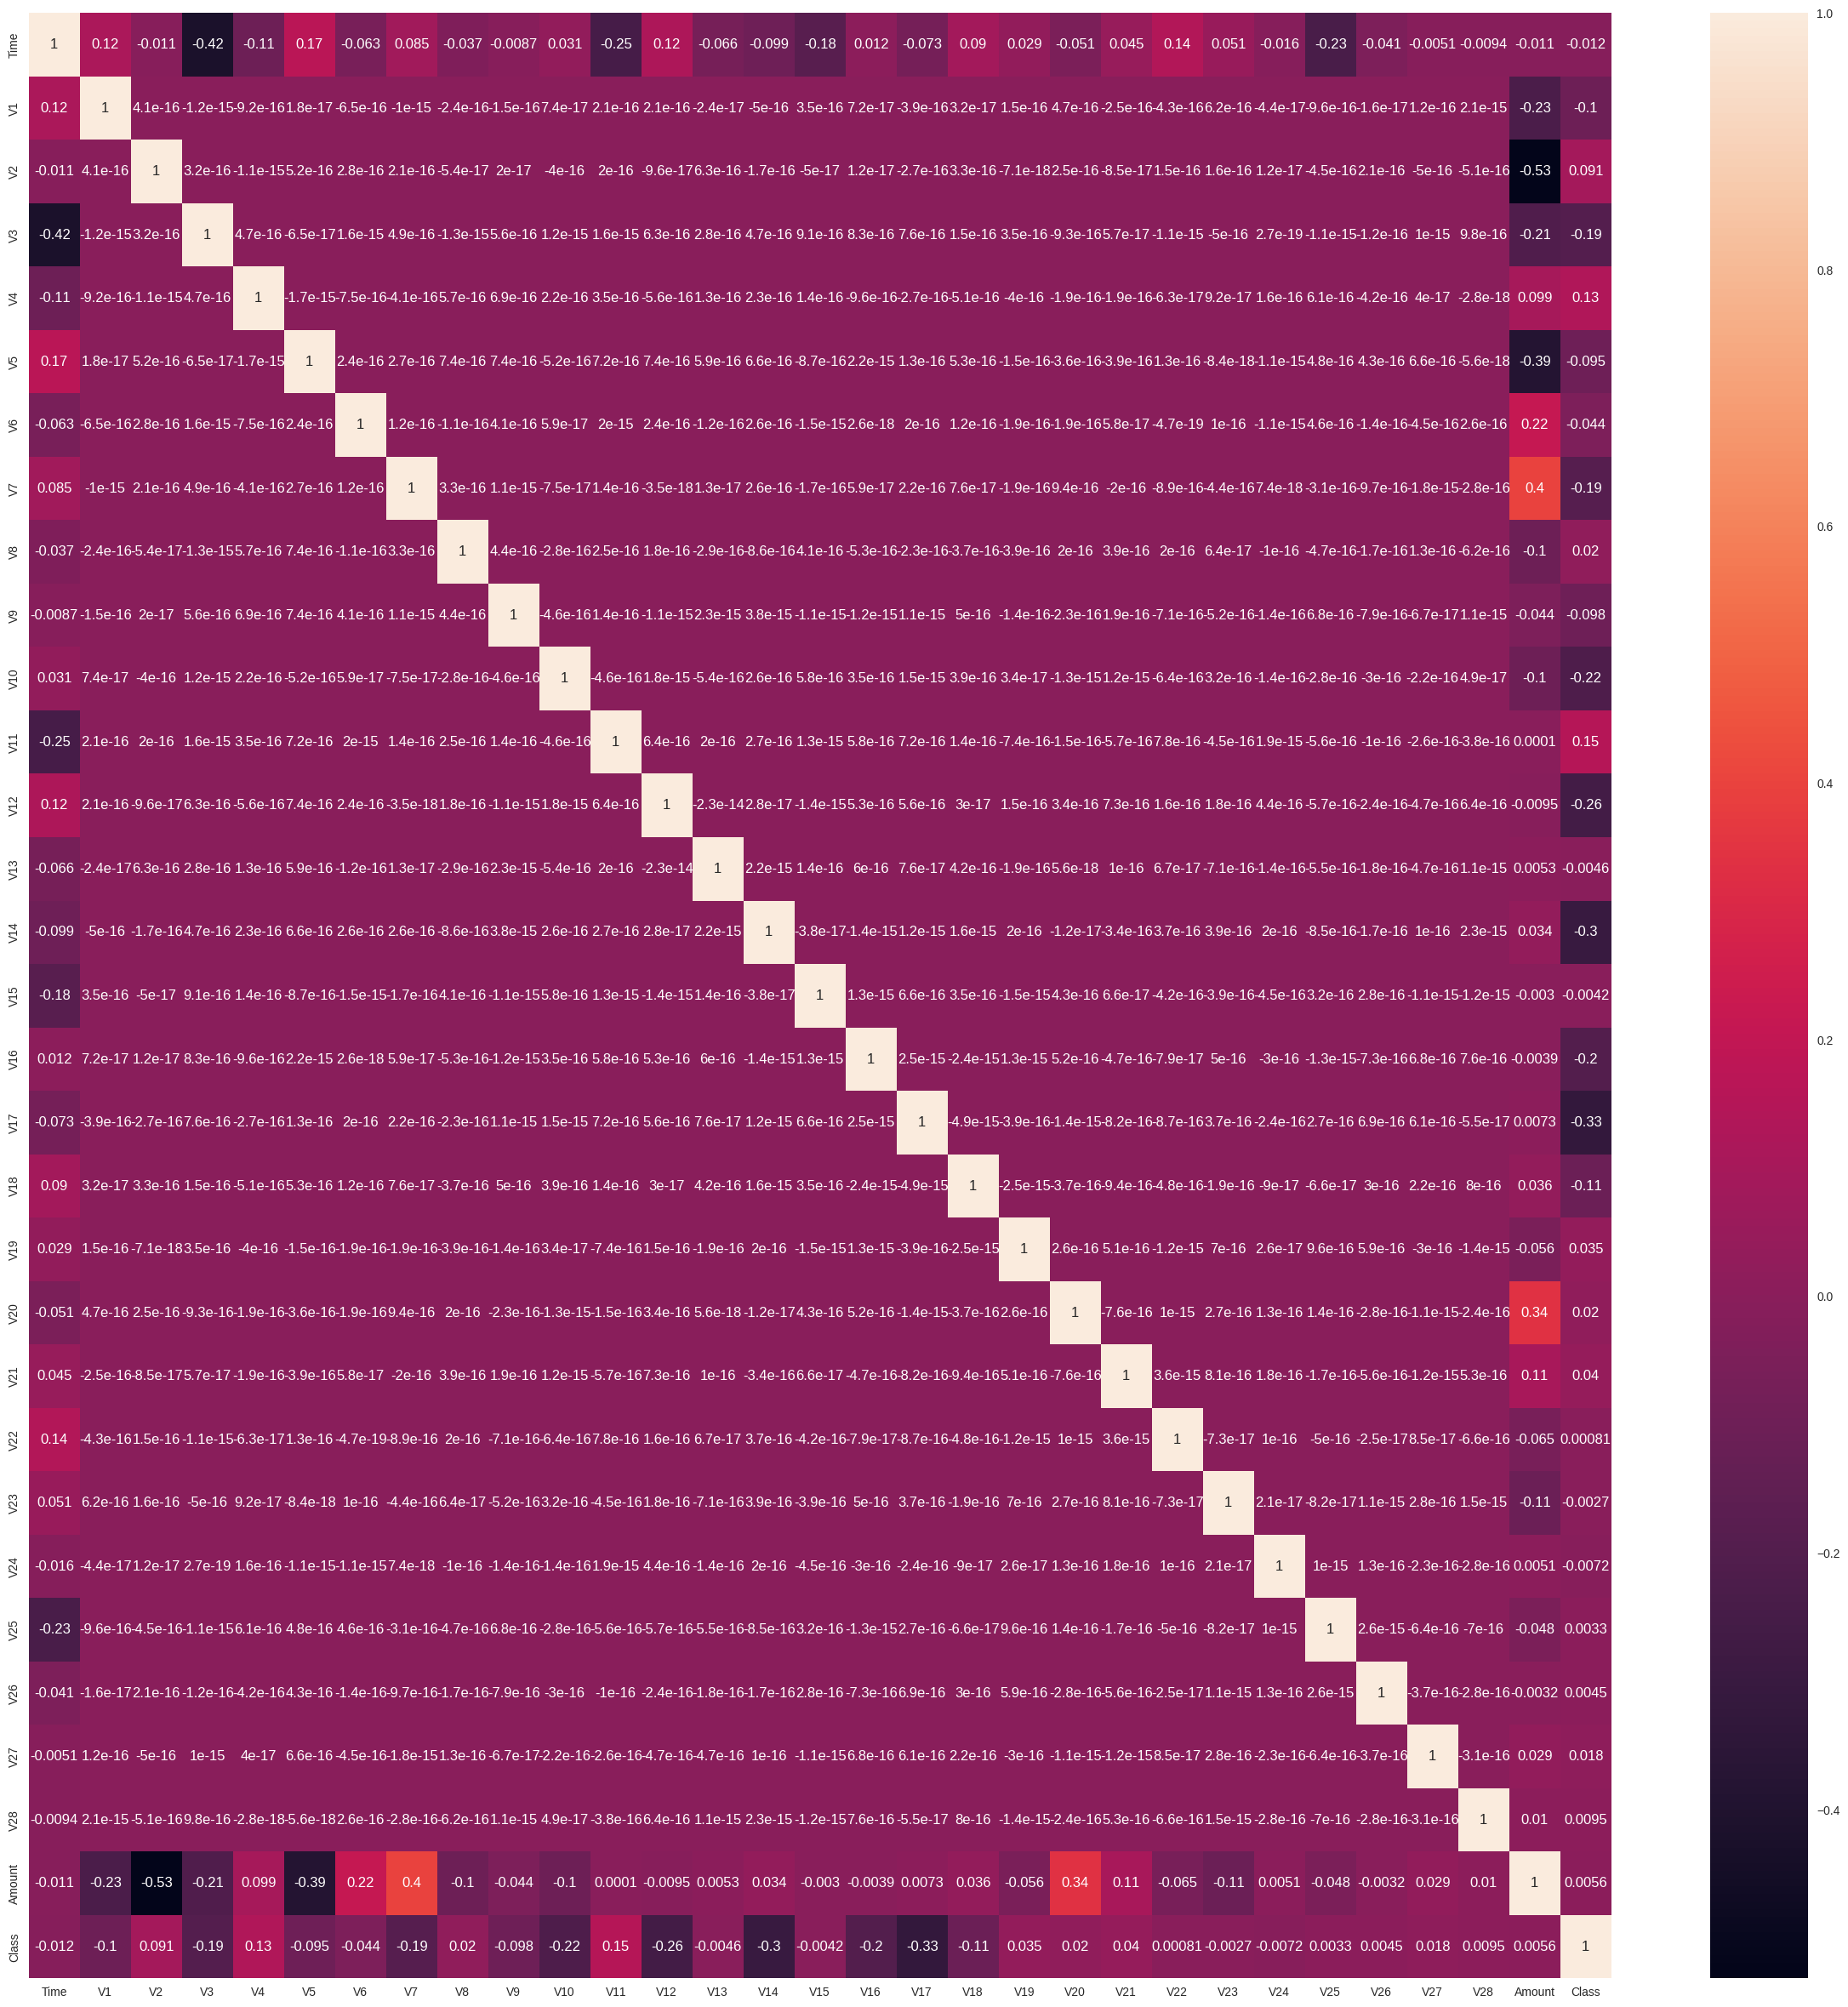

In [ ]:
df.corr()
plt.figure(figsize=(30,30))
g=sns.heatmap(df.corr(),annot=True)

In [ ]:
columns = df.columns.tolist()
# Making our Independent Features
columns = [var for var in columns if var not in ["Class"]]
# Making our Dependent Variable
target = "Class"
x= df[columns]
y= df[target]

In [ ]:
x.shape

(284807, 30)

In [ ]:
y.shape

(284807,)

In [ ]:
x.head() ## Independent Variable

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
y.head() ## Dependent Variable

,Class
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
iso_forest= IsolationForest(n_estimators=100, max_samples=len(x_train),random_state=0, verbose=0)

In [ ]:
iso_forest.fit(x_train,y_train)

IsolationForest(max_samples=199364, random_state=0)

In [ ]:
ypred= iso_forest.predict(x_test)

In [ ]:
ypred

array([-1,  1,  1, ...,  1,  1,  1])

In [ ]:
ypred[ypred == 1] = 0
ypred[ypred == -1] = 1


In [ ]:
print(accuracy_score(y_test,ypred))

0.9978465175614152


In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.37      0.51      0.43       136

    accuracy                           1.00     85443
   macro avg       0.69      0.76      0.72     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, ypred)

array([[85189,   118],
       [   66,    70]])

In [ ]:
n_errors = (ypred != y_test).sum()
print("Isolation Forest have {} errors.".format(n_errors))

Isolation Forest have 184 errors.


In [ ]:
from sklearn.svm import OneClassSVM

# Initialize One-Class SVM
svm = OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05, max_iter=-1)


In [ ]:
svm.fit(x_train,y_train)

In [ ]:
ypred1= svm.predict(x_test)

In [ ]:
ypred1[ypred1 == 1] = 0
ypred1[ypred1 == -1] = 1

In [ ]:
print(accuracy_score(y_test,ypred))

In [ ]:
print(classification_report(y_test,ypred))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, ypred)

In [ ]:
n_errors = (ypred1 != y_test).sum()
print("SVM have {} errors.".format(n_errors))

pycart technique


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 83.3 MB/s eta 0:00:00
   ━━━━━

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/creditdata.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
from pycaret.classification import *


In [ ]:
model= setup(data= df, target= 'Class')

,Description,Value
0,Session id,6934
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 31)"
4,Transformed data shape,"(284807, 31)"
5,Transformed train set shape,"(199364, 31)"
6,Transformed test set shape,"(85443, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:19:34
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
random_forest= create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9995,0.9406,0.8000,0.9333,0.8615,0.8613,0.8639
1,0.9996,0.9707,0.8286,0.9355,0.8788,0.8786,0.8802
2,0.9996,0.9706,0.8000,0.9655,0.8750,0.8748,0.8787
3,0.9995,0.9266,0.8000,0.9333,0.8615,0.8613,0.8639
4,0.9996,0.9398,0.7941,1.0000,0.8852,0.8851,0.8910
5,0.9997,0.9398,0.8824,0.9677,0.9231,0.9230,0.9239
6,0.9991,0.9230,0.5294,0.9000,0.6667,0.6662,0.6899
7,0.9996,0.9698,0.8824,0.8824,0.8824,0.8822,0.8822
8,0.9993,0.9234,0.7059,0.8889,0.7869,0.7866,0.7918


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
random_forest

NameError: name 'random_forest' is not defined

In [ ]:
tuned_model= tune_model('rf_model')

TypeError: The behavior of tune_model in version 1.0.1 is changed. Please pass trained model object.

In [ ]:
pred_holdout = predict_model(random_forest,data= x_test)

In [ ]:
pred_holdout

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,prediction_label,prediction_score
43428,41505.0,-16.526506,8.584971,-18.649853,9.505593,-13.793818,-2.832404,-16.701694,7.517344,-8.507059,-14.110185,5.299236,-10.834006,1.671120,-9.373858,0.360806,-9.899246,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.190002,1,0.93
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752661,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.119995,0,1.00
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.000000,0,1.00
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328336,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.500000,0,1.00
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.890000,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180795,124702.0,-0.673320,1.823100,-2.152665,-1.051308,1.822569,1.319646,-0.228012,-1.743339,-0.665095,-0.862529,0.861307,1.286577,1.027264,-0.610707,-1.202988,0.477090,0.477920,0.382276,-0.021559,-0.574493,2.292603,-0.929823,0.561185,2.970343,-0.632171,0.095316,0.031770,0.093565,3.990000,0,1.00
259979,159354.0,2.125553,-0.065046,-1.537467,0.125578,0.500319,-0.359530,0.124248,-0.201678,0.551045,0.061213,-1.396327,0.251877,0.409095,0.177262,0.118029,0.131953,-0.595918,-0.612472,0.439265,-0.157091,-0.342157,-0.878330,0.281129,0.035931,-0.173013,0.207555,-0.075438,-0.060078,1.790000,0,1.00
21885,31911.0,0.746800,-1.028053,1.127833,1.631418,-1.193487,0.946088,-0.857322,0.480905,1.662617,-0.316982,-1.751384,-0.756965,-2.356052,-0.222170,-0.010514,-0.126110,0.207875,0.013024,-0.337251,0.061614,0.073226,0.058198,-0.235697,-0.457909,0.328226,-0.219767,0.058352,0.058441,195.600006,0,1.00
217812,141043.0,2.080547,0.167780,-1.722107,0.403323,0.451991,-0.848388,0.190703,-0.239152,0.481197,-0.380899,-0.596944,0.187143,0.182916,-0.869580,0.197007,0.326745,0.447790,-0.303867,0.072552,-0.148994,-0.367406,-0.945073,0.332659,0.484916,-0.246959,0.174693,-0.061887,-0.030910,0.890000,0,1.00
